# Issues

##### initial Grid and chimera : 
- chains : {0: [0, 4], 145: [1, 5], 1: [2, 6],...} 
- external field : {0: 0.7306951699386792, 1: 0.8087668667592787, 2: 0.5901939987790653,...}
- neighbors_coupling : {(0, 145): -0.5, (0, 20880): -0.5, (0, 1): -0.5,...}
- Characteristics : 
    - starts from index 0 !
    - consecutive !
    - lattice of unit cells of size 73 (cf. manual embedding paper...)


##### Dwave : 
- qubits : [30, 31, 32, 33, 34...]
- couplers : [[30, 31], [31, 32], [32, 33], [33, 34], [34, 35]...]
- nice coordinates : [(0, -1, 0, 1, 0), (0, -1, 0, 1, 1), (0, -1, 0, 1, 2)...]
- Characteristics : 
    - Not necessarily starts from index 0 !!!!
    - Not necessarily consecutive !!!!
    - each one of the 3 layers in the pegasus graph has a size of only 16 (cf. pegasus.graph) !



In [1]:
from manual_embedding import *

rows = 145
columns = 145
embedding = grid_to_chimera(rows, columns)


In [2]:
from construct_ising import *
lattice_size = 145
beta = 0.5
probabilities = np.loadtxt("probabilities.txt", dtype=float, delimiter=" ")
external_field, neighbors_coupling = hamiltonian(lattice_size, beta, probabilities)

In [3]:
from dwave.system import DWaveSampler
sampler = DWaveSampler(solver={"topology__type": "pegasus"}, region="eu-central-1")

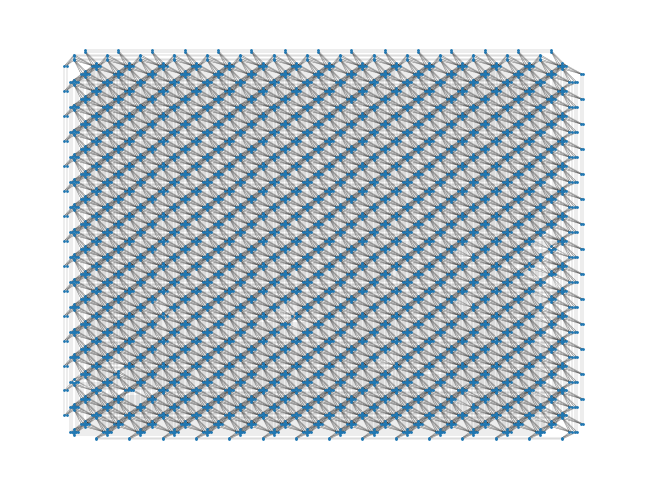

In [4]:
import dwave_networkx as dnx
pegasus = sampler.to_networkx_graph()
dnx.draw_pegasus(
    pegasus,
    with_labels=False,
    width=0.1,
    crosses=True,
    node_size=1,
    alpha=1,
    font_size=5,
)

In [5]:
pegasus.graph


{'name': 'pegasus_graph(16, 0)',
 'family': 'pegasus',
 'rows': 16,
 'columns': 16,
 'tile': 12,
 'vertical_offsets': (2, 2, 2, 2, 10, 10, 10, 10, 6, 6, 6, 6),
 'horizontal_offsets': (6, 6, 6, 6, 2, 2, 2, 2, 10, 10, 10, 10),
 'data': True,
 'labels': 'int'}

In [6]:
nice_coord = sorted(
    list(
        dnx.pegasus_coordinates(pegasus.graph["rows"]).linear_to_nice(node)
        for node in pegasus.nodes()
    )
)

In [7]:
qubits = sampler.properties["qubits"]
couplers = sampler.properties["couplers"]

# STOP

In [8]:
# from dwave.system import (
#     EmbeddingComposite,
#     FixedEmbeddingComposite,
#     LazyEmbeddingComposite,
#     LazyFixedEmbeddingComposite,
# )

# response = EmbeddingComposite(sampler).sample_ising(
#     external_field,
#     neighbors_coupling,
#     num_reads=1,
#     # return_embedding=True,
#     label="final",
# )

# response = FixedEmbeddingComposite(
#     sampler,
#     embedding={"130": [129, 130], "131": [131], "145": [145], "146": [146]},
# ).sample_ising(
#     external_field,
#     neighbors_coupling,
#     num_reads=1,
#     # return_embedding=True,
#     label="final",
# )

# response = LazyEmbeddingComposite(sampler).sample_ising(
#     external_field,
#     neighbors_coupling,
#     num_reads=1,
#     # return_embedding=True,
#     label="final",
# )

# response = LazyFixedEmbeddingComposite(sampler).sample_ising(
#     external_field,
#     neighbors_coupling,
#     num_reads=1,
#     # return_embedding=True,
#     label="final",
# )

# print(response.properties['embedding'])


In [9]:
# result_sample = response.first.sample
# result_energy = response.first.energy
# print("Energy :{}".format(result_energy))

In [10]:
# clmap = np.array(list(result_sample.values())).reshape(145, 145).astype("float")
# plot_image(clmap, "dwave_quantum_annealing_segmentation.png")

# JUNK

In [11]:
# embedding.values()
# # # 84100


In [12]:
# # the returned indexe starts down and return backwards until : row size of chimera > linear div 8
# # therefore it will be always embeded in the first row of the chimera
# dnx.chimera_coordinates(35).linear_to_chimera(272)


In [13]:
# dnx.chimera_coordinates(73).linear_to_chimera(272)
# dnx.pegasus_coordinates(pegasus.graph["rows"]).linear_to_nice(3525)
# [list(pegasus.nodes(data=True))]
# pegasus.graph
# dict(pegasus.nodes(data=True))
# dnx.pegasus_coordinates(pegasus_size).linear_to_pegasus(30)


In [14]:
# import numpy as np
# for node in pegasus.nodes:
#     pegasus.nodes[node]["bias"] = external_field.get(node, 0)
# for edge in pegasus.edges:
#     pegasus.edges[edge]["quadratic"] = neighbors_coupling.get(node, 0)


In [15]:
# import dimod

# bqm = dimod.from_networkx_graph(
#     pegasus, vartype="SPIN", node_attribute_name="bias", edge_attribute_name="quadratic"
# )
# num_reads = 1
# response = sampler.sample(
#     bqm,
#     num_reads=num_reads,
#     # auto_scale=True,
#     # num_spin_reversal_transforms=5,
#     # return_embedding=True,
#     # answer_mode="raw",
#     label="final",
# )


In [16]:
# with open("dwave_couplers.txt") as my_file:
#     lines = my_file.read().replace("[", "").replace("]", "").split(',')
# dwave_couplers = [int(i) for i in lines]
# test = [i for i in range (30, 5730)]
# len(list(set(test) - set(dwave_couplers)))


In [17]:
# check = all(item in couplers for item in list(chimera.edges))
# list(enumerate(qubits))[0]
# dict(sorted(neighbors_coupling.items(), key=lambda item: item[1]))
# h = {v: external_field[i] for i,v in enumerate(qubits) }
# J = {(u, v): 1 for u, v in P16.edges}


In [18]:
# chimera = dnx.chimera_graph(
#     5,
#     node_list=qubits[0:100],
#     edge_list=[
#         ele for ele in couplers if ele[0] < qubits[100] and ele[1] < qubits[100]
#     ],
#     check_node_list=True,
#     check_edge_list=True,
# )
# dnx.draw_chimera(
#     chimera,
#     with_labels=True,
#     node_color="Yellow",
#     width=0.1,
#     node_size=75,
#     alpha=1,
#     font_size=5,
# )
# dnx.draw_chimera_embedding(
#     chimera,
#     emb=embedding,
#     with_labels=True,
#     width=0.1,
#     node_size=75,
#     alpha=1,
#     font_size=5,
# )


In [19]:
# dnx.draw_pegasus_embedding(
#     pegasus,
#     emb=embedding,
#     with_labels=False,
#     width=0.1,
#     crosses=True,
#     node_size=1,
#     alpha=1,
#     font_size=5,
# )
